In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

%matplotlib inline
np.random.seed(0)

(100, 1) (100,)


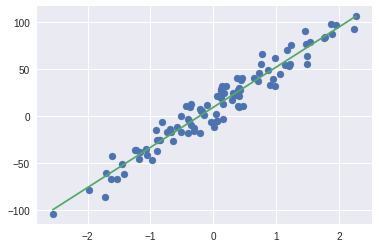

In [0]:
x, y = datasets.make_regression(n_samples=100, n_features=1, n_targets=1, bias=10, noise=10)
plt.scatter(x,y)
print(x.shape, y.shape)
x = np.hstack((x, np.ones((x.shape[0],1))))
x = np.fliplr(x)
theta = np.linalg.pinv(x)@y

x_min, x_max = x.min(), x.max()

y_min = [1, x_min] @ theta
y_max = [1, x_max] @ theta

plt.plot(x[:,1], y, '.')
plt.plot([x_min, x_max], [y_min, y_max])

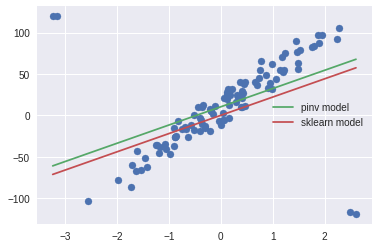

In [0]:
# Add four strong outliers to the dataset.
X_outliers = np.random.normal(0, 0.5, size=(4, 1))
y_outliers = np.random.normal(0, 2.0, size=4)
X_outliers[:2, :] += x.max() + x.mean() 
X_outliers[2:, :] += x.min() - x.mean() 
y_outliers[:2] += y.min() - y.mean() 
y_outliers[2:] += y.max() + y.mean()
X_outliers = np.concatenate((np.ones((X_outliers.shape[0],1)), X_outliers), axis=1)
x = np.vstack((x, X_outliers))
y = np.concatenate((y, y_outliers))
plt.scatter(x[:,1], y)
theta = np.linalg.pinv(x)@y
# print(np.linalg.pinv(x)@y)
x_min, x_max = x.min(), x.max()

y_min = [1, x_min] @ theta
y_max = [1, x_max] @ theta

plt.plot(x[:,1], y, '.')
plt.plot([x_min, x_max], [y_min, y_max], label='pinv model')

lm = linear_model.LinearRegression()
model = lm.fit(x,y)
theta = model.coef_
y_min = [1, x_min] @ theta
y_max = [1, x_max] @ theta

plt.plot([x_min, x_max], [y_min, y_max], label='sklearn model')
plt.legend()

(104, 1) (104,)


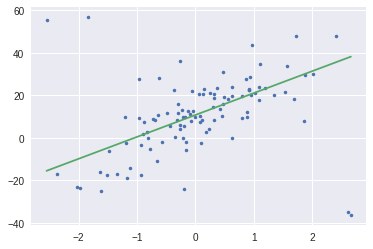

In [0]:
x, y = datasets.make_regression(n_samples=100, n_features=1, n_targets=1, bias=10, noise=10)

X_outliers = np.random.normal(0, 0.5, size=(4, 1))
y_outliers = np.random.normal(0, 2.0, size=4)
X_outliers[:2, :] += x.max() + x.mean() 
X_outliers[2:, :] += x.min() - x.mean() 
y_outliers[:2] += y.min() - y.mean() 
y_outliers[2:] += y.max() + y.mean()
x = np.vstack((x, X_outliers))
y = np.concatenate((y, y_outliers))

ransac = linear_model.RANSACRegressor()
print(x.shape, y.shape)
model = ransac.fit(x,y)

x_min, x_max = x.min(), x.max()
y_min = model.predict(x_min.reshape(-1,1))
y_max = model.predict(x_max.reshape(-1,1))
plt.plot(x, y, '.')
plt.plot([x_min, x_max], [y_min, y_max], label='sklearn model')

In [0]:
def fit_line_model(points):
    m = (points[1,1] - points[0,1]) / (points[1,0] - points[0,0]) # y2-y1 / x2-x1
    c = points[1,1] - m*points[1,0] # y = mx+c
    
    return m,c

def find_intercept_point(m,c,x0,y0):
    x = (x0 + m*y0 - m*c)/(1 + m**2)
    y = (m*x0 + (m**2)*y0 - (m**2)*c)/(1 + m**2) + c    
    return x,y 

(104, 1) (104,)
(104, 2)


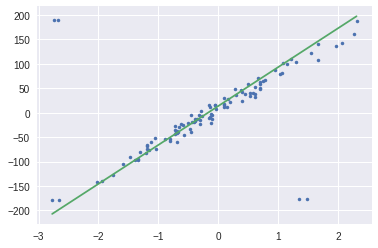

In [0]:
n = 2 # two random points
outlier_threshold = 10
n_samples = x.shape[0]
ratio = 0.0
best_m = 0.0
best_c = 0.0

print(x.shape, y.shape)
min_x = x.min()
max_x = x.max()
data = np.vstack((x.flatten(), y)).transpose()
print(data.shape)

for i in range(100):

    all_indices = np.arange(x.shape[0])
    np.random.shuffle(all_indices)
    indices_1 = all_indices[:n]
    indices_2 = all_indices[n:]

    model_points = data[indices_1,:]
    test_points = data[indices_2,:]

    m,c = fit_line_model(model_points)

    xlist = []
    ylist=[]
    for ind in range(test_points.shape[0]):
        x0 = data[ind,0]
        y0 = data[ind,1]

        distx, disty = find_intercept_point(m,c,x0,y0)
        dist = np.sqrt((distx-x0)**2 + (disty-y0)**2)
        if dist < outlier_threshold:
            xlist.append(x0)
            ylist.append(y0)

    x_inliers = np.array(xlist)
    y_inliers = np.array(ylist)

    if x_inliers.shape[0]/n_samples > ratio:
        ratio = x_inliers.shape[0] / n_samples
        best_m = m
        best_c = c
        
y_min = best_m*x_min + best_c
y_max = best_m*x_max + best_c

plt.plot(x, y, '.')
plt.plot([x_min, x_max], [y_min, y_max], label='sklearn model')

In [0]:
import keras
from sklearn.model_selection import train_test_split

model = keras.Sequential()
# model.add(keras.layers.Lambda(lambda x: x / ))
model.add(keras.layers.Dense(1,input_shape=(1,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_33 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_34 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_35 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 17        
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


(6700, 1) (6700,) (3301, 1) (3301,)


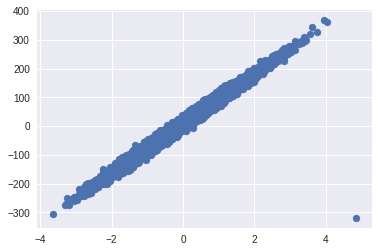

In [0]:
x, y = datasets.make_regression(n_samples=10000, n_features=1, n_targets=1, bias=10, noise=10,random_state=1)
np.random.seed(1)
X_outliers = np.random.normal(0, 0.5, size=(1, 1))
y_outliers = np.random.normal(0, 2.0, size=1)
X_outliers[:2, :] += x.max() + x.mean() 
X_outliers[2:, :] += x.min() - x.mean() 
y_outliers[:2] += y.min() - y.mean() 
y_outliers[2:] += y.max() + y.mean()
x = np.vstack((x, X_outliers))
y = np.concatenate((y, y_outliers))
plt.scatter(x,y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [0]:
hitory = model.fit(x_train, y_train, epochs=10, verbose=2, validation_split=0.1)

Train on 6030 samples, validate on 670 samples
Epoch 1/10
 - 0s - loss: 197.3297 - val_loss: 103.8165
Epoch 2/10
 - 0s - loss: 191.1447 - val_loss: 100.1250
Epoch 3/10
 - 0s - loss: 191.6459 - val_loss: 100.3982
Epoch 4/10
 - 0s - loss: 190.7722 - val_loss: 98.7852
Epoch 5/10
 - 0s - loss: 189.5313 - val_loss: 97.3882
Epoch 6/10
 - 0s - loss: 190.1571 - val_loss: 98.3421
Epoch 7/10
 - 0s - loss: 189.0939 - val_loss: 98.0549
Epoch 8/10
 - 0s - loss: 189.8941 - val_loss: 97.3142
Epoch 9/10
 - 0s - loss: 189.5663 - val_loss: 98.8982
Epoch 10/10
 - 0s - loss: 188.3735 - val_loss: 100.9203


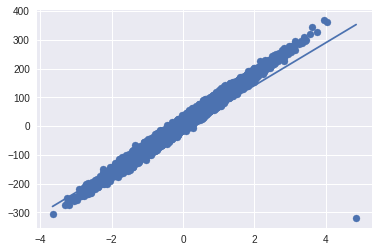

In [0]:
x_min = x.min()
x_max = x.max()
y_hat = model.predict(np.vstack((x_min, x_max)))
plt.scatter(x,y)
plt.plot([x_min, x_max], y_hat, label='sklearn model')